In [1]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from agent_code.dqn_agent.dqn_model import DQN, Buffer

In [2]:
def latest(d):
    def steps(name):
        return int(name.split('step-')[-1].split('_interval')[0])
    def date(name):
        return datetime.datetime.fromisoformat(name.split('_')[0][6:])
    flist = np.array([[f, date(f), steps(f)] for f in os.listdir(d) if os.path.isfile(d+f)])
    return flist[np.argmax(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])][0]

In [3]:
last = True
directory = './agent_code/dqn_agent/models/'
name = ''

In [4]:
name = latest(directory) if last else name
print('Model name:', name)
interval = int(name.split('interval-')[1].split('.pth')[0])
data = T.load('./agent_code/dqn_agent/models/' + name)['analysis']
print(f'Lenght of analysis data: {len(data)}')
data = np.array(data)
steps = np.arange(0, data.shape[0] * interval, interval) + interval
print(f'This corresponds to {np.max(steps)} training steps.')
print('Excerpt of the data:\n',data[0])

Model name: model-2019-03-16 20:17:21_step-650000_interval-20.pth
Lenght of analysis data: 16250
This corresponds to 325000 training steps.
Excerpt of the data:
 {'action': tensor(1), 'reward': -21, 'epsilon': 0.9998963896352216, 'explored': 1}


In [5]:
action = [step['action'] for step in data]
reward = [step['reward'] for step in data]
epsilon = [step['epsilon'] for step in data]
explored = [step['explored'] for step in data]

### Plot of action taken in each step

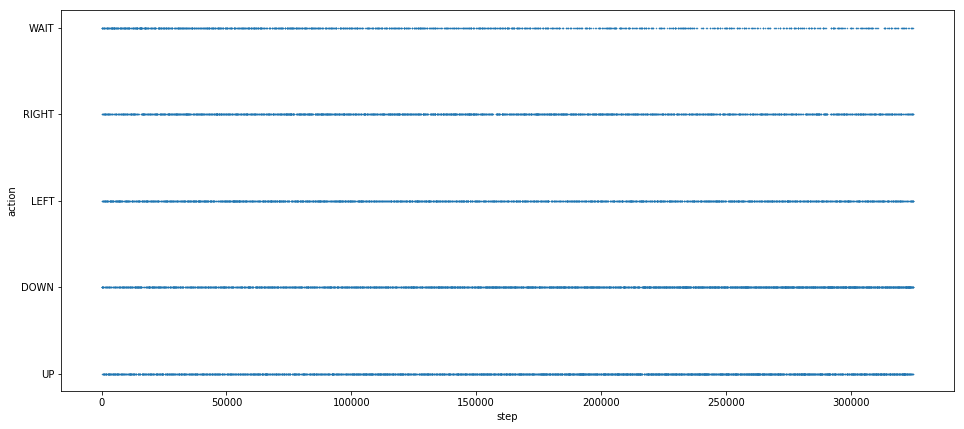

In [6]:
plt.figure(figsize=(16, 7))
plt.yticks(np.arange(5), ('UP', 'DOWN', 'LEFT', 'RIGHT', 'WAIT'))
plt.xlabel('step')
plt.ylabel('action')
plt.plot(steps, action, '.', ms=1)

### Plot of exploration vs exploitation

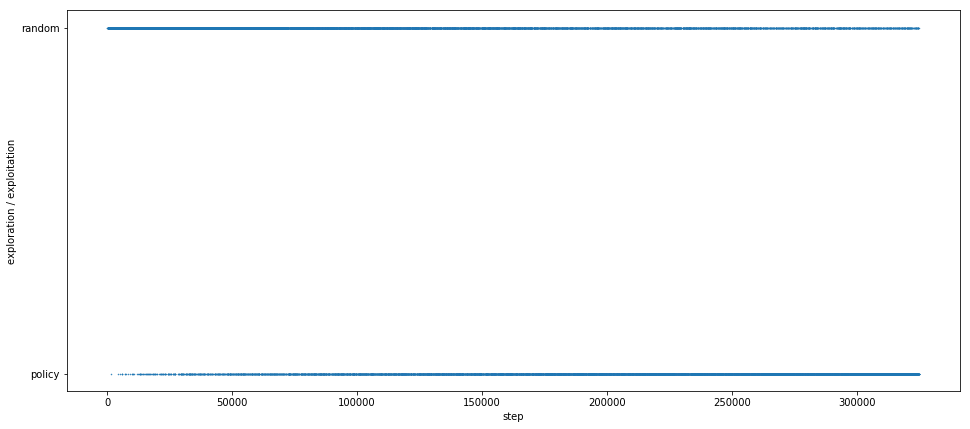

In [7]:
plt.figure(figsize=(16, 7))
plt.xlabel('step')
plt.ylabel('exploration / exploitation')
plt.yticks([0, 1], ('policy', 'random'))
plt.plot(steps, explored, '.', ms=1)

### Plot of reward in each step

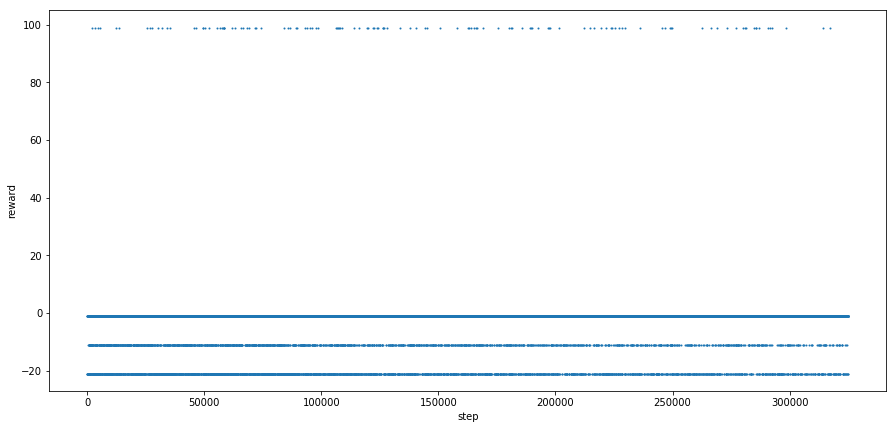

In [8]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('reward')
plt.plot(steps, reward, '.', ms=2)

### Plot of epsilon over training period

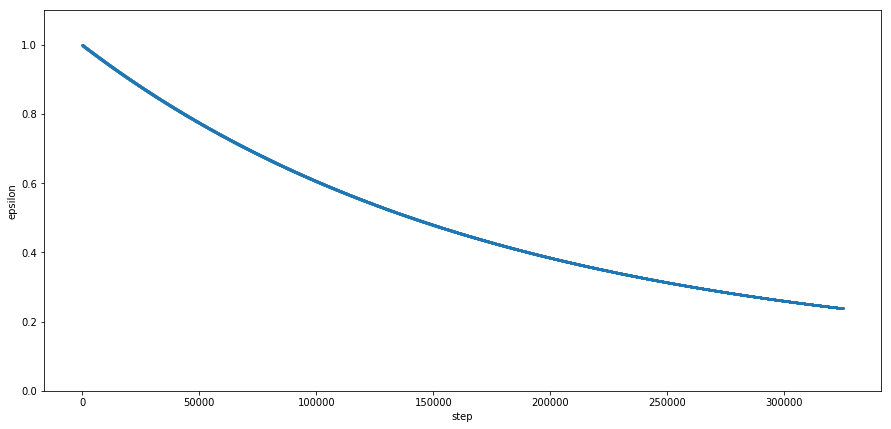

In [9]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('epsilon')
plt.ylim(0, 1.1)
plt.plot(steps, epsilon, '.', ms=2)